<a href="https://colab.research.google.com/github/HunterTzou/DATA_110_FALL_2025/blob/main/Tzou_Hunter_Sleep_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sleep Health and Lifestyle Study
**Hunter Tzou - DATA 110 Project 1**

## Introduction

Sleep is one of the most important components of our lives and one which is often neglected. I believe that we could all practice better sleep hygiene and by studying this dataset, I am hoping that we might be able to improve our sleep.

The [ODPHP's website](https://odphp.health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep) says that we could see the following benefits from getting more sleep:
- Get sick less often
- Stay at a healthy weight
- Lower your risk for serious health problems, like diabetes and heart disease
- Reduce stress, improve your mood, and get along better with people
- Think more clearly, form long-term memories, and do better in school and at work
- Make good decisions and avoid injuries — for example, drowsy drivers cause thousands of car accidents every year

Due to experiencing some of the negative side effects of chronic sleep deprivation, I wanted to study the different lifestyle components which could affect our sleep.

### Research Questions
1. How does stress level correlate with sleep duration and quality?
2. Does physical activity level impact sleep quality?
3. Is there a relationship between BMI category and sleep disorders?

## Data Source and Data Dictionary

This dataset was picked from [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data). I picked this dataset because I am interested in sleep studies and how different health and lifestyle variables can affect sleep quality. I also saw that this dataset had enough depth for me to use for this project.

### Data Dictionary

| **Column Name** | **Description** |
|------------------|-----------------|
| `Person ID` | Unique identifier for each individual. |
| `Gender` | Gender of the person (`Male` or `Female`). |
| `Age` | Age of the person in years. |
| `Occupation` | Occupation or profession of the person. |
| `Sleep Duration (hours)` | Number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | Subjective rating of sleep quality, ranging from 1 (poor) to 10 (excellent). |
| `Physical Activity Level (minutes/day)` | Number of minutes the person engages in physical activity daily. |
| `Stress Level (scale: 1-10)` | Subjective rating of stress level, ranging from 1 (low) to 10 (high). |
| `BMI Category` | Body Mass Index category (`Underweight`, `Normal`, `Overweight`). |
| `Blood Pressure (systolic/diastolic)` | Blood pressure measurement in systolic/diastolic format (e.g., 120/80). |
| `Heart Rate (bpm)` | Resting heart rate of the person, measured in beats per minute. |
| `Daily Steps` | Number of steps the person takes per day. |
| `Sleep Disorder` | Indicates whether the person has a sleep disorder (`None`, `Insomnia`, `Sleep Apnea`). |

**Sleep Disorder Details:**
- `None`: The individual does not exhibit any specific sleep disorder.
- `Insomnia`: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- `Sleep Apnea`: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

According to the [ODPHP's website](https://odphp.health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep), adults need a minimum of 7 hours of good quality sleep. We will define good quality of sleep as above 5. Anything below this standard is defined as inadequate sleep.

### Possible Dataset Shortcomings

Based on the [ODPHP's website](https://odphp.health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep), sleep schedule is an important factor in both the quality of sleep and the benefits we receive. This is missing from this dataset, so I think that would be something to add to make it more robust.

## Data Loading and Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Zhouhun/DATA_110_FALL_2025/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv')

## AI Acknowledgement: I had Chat GPT give me a color palette
sleep_palette = [
    '#4C72B0',  # Deep royal blue (bold)
    '#6A5ACD',  # Vibrant violet-blue (bold)
    '#C5B4E3',  # Soft lavender
    '#A8C5E2',  # Pastel sky blue
    '#9D81BA',  # Muted purple highlight
    '#DCE3F2'   # Pale gray-blue (neutral)
]

## Exploratory Data Analysis

### Initial Data Inspection

In [2]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)
print("\n")

# Display first 10 rows
print("First 10 rows of the dataset:")
df.head(10)

Dataset shape: (374, 13)


First 10 rows of the dataset:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [3]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### Data Cleaning

**Handling Missing Values:**

In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

## AI Acknowledgement: I learned how to replace null values from ChatGPT
# Replace None values in Sleep Disorder column
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Verify the fix
print("\nAfter filling missing values:")
print(df.isnull().sum())

Missing values per column:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

After filling missing values:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


**Checking for Unique Person IDs:**

In [5]:
# Verify Person ID is unique
print("Are Person IDs unique?", df['Person ID'].is_unique)

Are Person IDs unique? True


**Checking for Duplicates:**

In [6]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


### Data Standardization

**Normalizing Categorical Values:**

In [7]:
# Check unique values in object columns
print("Unique values in Gender:", df['Gender'].unique())
print("Unique values in Occupation:", df['Occupation'].unique())
print("Unique values in BMI Category:", df['BMI Category'].unique())
print("Unique values in Sleep Disorder:", df['Sleep Disorder'].unique())

# Standardize BMI Category
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

# Consolidate Occupation categories
df['Occupation'] = df['Occupation'].replace({'Software Engineer': 'Engineer'})
df['Occupation'] = df['Occupation'].replace({'Sales Representative': 'Salesperson'})

print("\nAfter standardization:")
print("Unique Occupations:", df['Occupation'].unique())
print("Unique BMI Categories:", df['BMI Category'].unique())

Unique values in Gender: ['Male' 'Female']
Unique values in Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in Sleep Disorder: ['None' 'Sleep Apnea' 'Insomnia']

After standardization:
Unique Occupations: ['Engineer' 'Doctor' 'Salesperson' 'Teacher' 'Nurse' 'Accountant'
 'Scientist' 'Lawyer' 'Manager']
Unique BMI Categories: ['Overweight' 'Normal' 'Obese']


### Creating Derived Columns

**Age Categories:**

In [8]:
## AI Acknowledgement: I asked ChatGPT how to apply custom logic to create new columns
def age_category(row):
    age = row['Age']
    if age < 35:
        return '25–34'
    elif 35 <= age <= 44:
        return '35–44'
    elif 45 <= age <= 54:
        return '45–54'
    elif age >= 55:
        return '55–64'
    else:
        return 'Unknown'

df['Age Category'] = df.apply(age_category, axis=1)
print("Age categories created successfully")
df[['Age', 'Age Category']].head()

Age categories created successfully


,Age,Age Category
0,27,25–34
1,28,25–34
2,28,25–34
3,28,25–34
4,28,25–34


**Blood Pressure Analysis:**

In [9]:
## AI Acknowledgement: I asked ChatGPT how to split a string into two columns
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Categorize blood pressure based on AHA guidelines
def bp_category(row):
    sys, dia = row['Systolic'], row['Diastolic']
    if sys < 120 and dia < 80:
        return 'Normal'
    elif 120 <= sys <= 129 and dia < 80:
        return 'Elevated'
    elif (130 <= sys <= 139) or (80 <= dia <= 89):
        return 'Stage 1 Hypertension'
    elif sys >= 140 or dia >= 90:
        return 'Stage 2 Hypertension'
    elif sys > 180 or dia > 120:
        return 'Hypertensive Emergency'
    else:
        return 'Unknown'

df['BP Category'] = df.apply(bp_category, axis=1)

print("Blood pressure categories created successfully")
df[['Blood Pressure', 'Systolic', 'Diastolic', 'BP Category']].head()

Blood pressure categories created successfully


,Blood Pressure,Systolic,Diastolic,BP Category
0,126/83,126,83,Stage 1 Hypertension
1,125/80,125,80,Stage 1 Hypertension
2,125/80,125,80,Stage 1 Hypertension
3,140/90,140,90,Stage 2 Hypertension
4,140/90,140,90,Stage 2 Hypertension


### Summary Statistics

In [10]:
# Display summary statistics
print("Summary Statistics for Numeric Columns:")
df.describe().round(2)

Summary Statistics for Numeric Columns:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84,128.55,84.65
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92,7.75,6.16
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00,115.00,75.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00,125.00,80.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00,130.00,85.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00,135.00,90.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00,142.00,95.00


### Demographic Analysis

**Gender Distribution:**

In [11]:
gender_summary = df.groupby('Gender')[['Sleep Duration', 'Quality of Sleep','Stress Level','Heart Rate', 'Systolic', 'Diastolic']].mean().round(2)
gender_summary['#'] = df['Gender'].value_counts()
gender_summary['% of Total'] = df['Gender'].value_counts(normalize=True) * 100
gender_summary = gender_summary.rename(columns={
    'Stress Level': 'Avg Stress Level',
    'Heart Rate': 'Avg Heart Rate',
    'Sleep Duration': 'Avg. Sleep Duration',
    'Quality of Sleep': 'Avg. Sleep Quality'
})
gender_summary['Avg. BP Category'] = gender_summary.apply(bp_category, axis=1)
gender_summary = gender_summary[['#', '% of Total', 'Avg. Sleep Duration', 'Avg. Sleep Quality','Avg Stress Level', 'Avg Heart Rate', 'Systolic', 'Diastolic', 'Avg. BP Category']].round(2)

print("Gender Distribution and Averages:")
gender_summary

Gender Distribution and Averages:


,#,% of Total,Avg. Sleep Duration,Avg. Sleep Quality,Avg Stress Level,Avg Heart Rate,Systolic,Diastolic,Avg. BP Category
Gender,,,,,,,,,
Female,185,49.47,7.23,7.66,4.68,69.26,130.20,86.32,Stage 1 Hypertension
Male,189,50.53,7.04,6.97,6.08,71.05,126.94,83.02,Stage 1 Hypertension


**Age Distribution:**

In [12]:
Age_summary = df.groupby('Age Category')[['Sleep Duration', 'Quality of Sleep','Stress Level','Heart Rate', 'Systolic', 'Diastolic']].mean().round(2)
Age_summary['#'] = df['Age Category'].value_counts()
Age_summary['% of Total'] = df['Age Category'].value_counts(normalize=True) * 100
Age_summary = Age_summary.rename(columns={
    'Stress Level': 'Avg Stress Level',
    'Heart Rate': 'Avg Heart Rate',
    'Sleep Duration': 'Avg. Sleep Duration',
    'Quality of Sleep': 'Avg. Sleep Quality'
})
Age_summary['Avg. BP Category'] = Age_summary.apply(bp_category, axis=1)
Age_summary = Age_summary[['#', '% of Total', 'Avg. Sleep Duration', 'Avg. Sleep Quality','Avg Stress Level', 'Avg Heart Rate', 'Systolic', 'Diastolic', 'Avg. BP Category']].round(2)

print("Age Distribution and Averages:")
Age_summary

Age Distribution and Averages:


,#,% of Total,Avg. Sleep Duration,Avg. Sleep Quality,Avg Stress Level,Avg Heart Rate,Systolic,Diastolic,Avg. BP Category
Age Category,,,,,,,,,
25–34,82,21.93,6.80,6.32,6.89,72.33,123.63,81.01,Stage 1 Hypertension
35–44,168,44.92,7.10,7.40,5.15,69.57,126.54,82.86,Stage 1 Hypertension
45–54,89,23.80,7.12,7.40,5.36,70.13,132.89,87.75,Stage 1 Hypertension
55–64,35,9.36,8.10,9.00,3.06,68.06,138.74,93.86,Stage 1 Hypertension


**Key Observations:**
- Gender distribution is slightly unequal but fairly balanced
- Majority of participants are in the 35-44 age range (~38%)
- Most participants fall into Stage 1 Hypertension blood pressure category
- Average sleep duration is above the minimum 7 hours recommended
- Average sleep quality is above 5 (our threshold for adequate sleep)

---

## Visualization 1: Stress Level and Sleep Quality

### Caption
This visualization examines the relationship between stress level (inverted so higher is better), sleep duration, and sleep quality across different occupations. The goal is to determine whether occupations with lower stress levels also experience better sleep quality and duration.

### Data Preparation

In [13]:
# Invert stress level (so higher values = less stress = better)
df['Inverted Stress Level'] = 11 - df['Stress Level']

## AI Acknowledgement: I asked ChatGPT how to normalize values for comparison
scaler = MinMaxScaler(feature_range=(1, 10))
col_scale = ['Sleep Duration']
df_scaled = df.copy()
df_scaled[col_scale] = scaler.fit_transform(df_scaled[col_scale]).round(2)

# Create summary by occupation
stress_viz = df_scaled.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep','Inverted Stress Level']].mean().round(2)
stress_viz = stress_viz.sort_values(by='Quality of Sleep', ascending=False)

print("Data prepared for visualization")
stress_viz.head()

Data prepared for visualization


,Sleep Duration,Quality of Sleep,Inverted Stress Level
Occupation,,,
Engineer,8.05,8.30,6.99
Accountant,5.38,7.89,6.41
Lawyer,6.37,7.89,5.94
Nurse,5.21,7.37,5.45
Manager,4.67,7.00,6.00


### Visualization

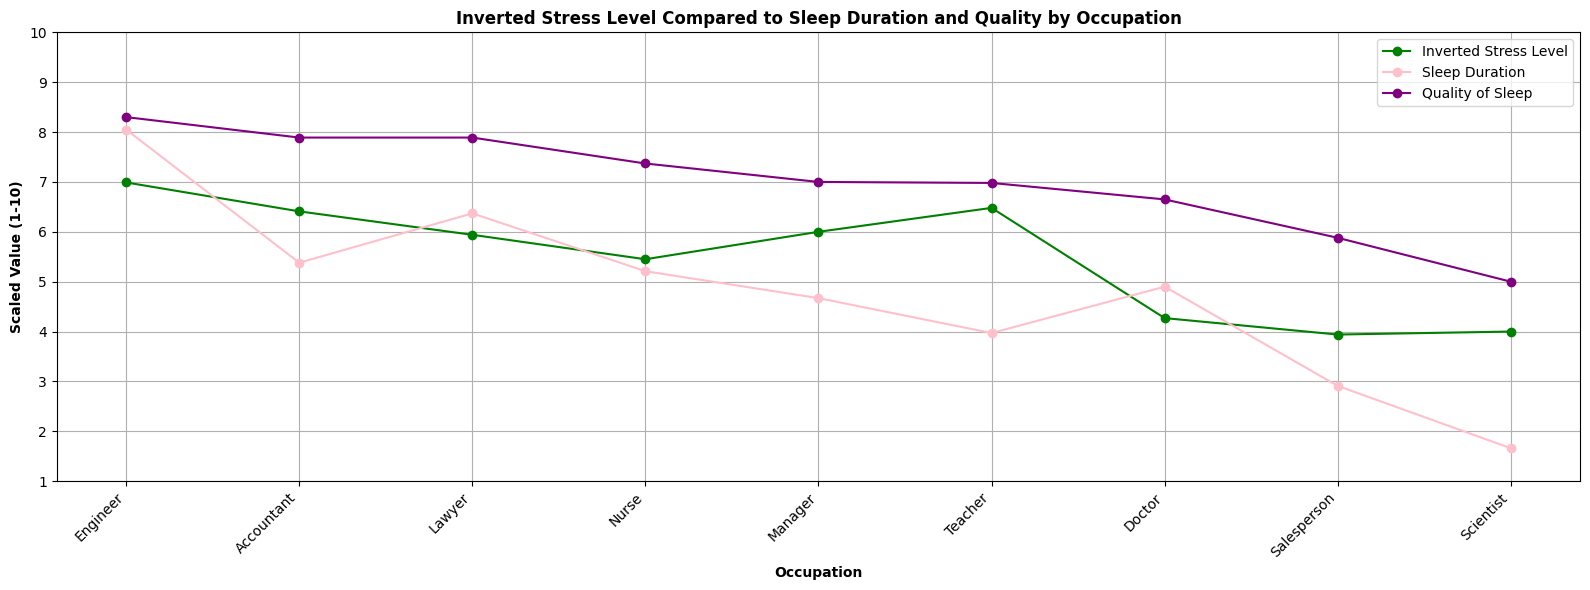

In [14]:
plt.figure(figsize=(16, 6))
plt.plot(stress_viz.index, stress_viz['Inverted Stress Level'], marker='o', color='green', label='Inverted Stress Level')
plt.plot(stress_viz.index, stress_viz['Sleep Duration'], marker='o', color='pink', label='Sleep Duration')
plt.plot(stress_viz.index, stress_viz['Quality of Sleep'], marker='o', color='purple', label='Quality of Sleep')

plt.grid()
plt.ylim(1,10)
plt.title("Inverted Stress Level Compared to Sleep Duration and Quality by Occupation", fontweight='bold')
plt.xlabel("Occupation", fontweight='bold')
plt.ylabel("Scaled Value (1-10)", fontweight='bold')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Correlation Analysis

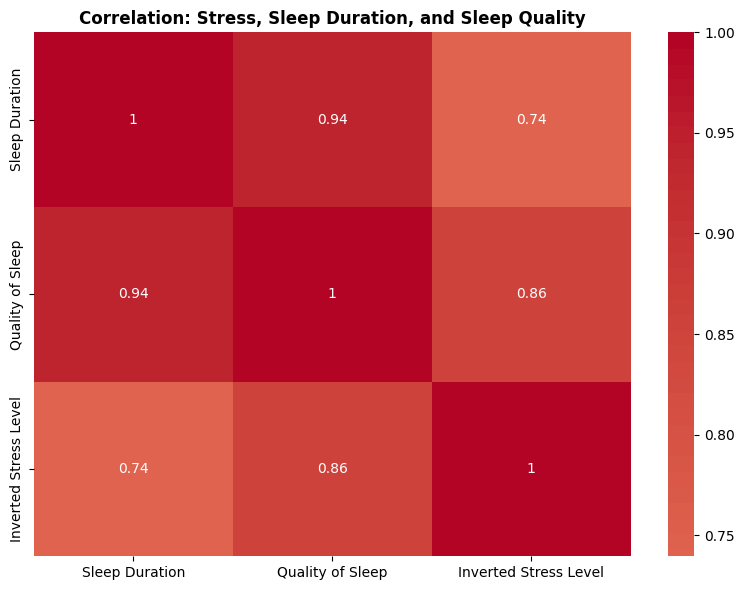

In [15]:
## AI Acknowledgement: I asked ChatGPT how to create a heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = stress_viz.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation: Stress, Sleep Duration, and Sleep Quality", fontweight='bold')
plt.tight_layout()
plt.show()

### Key Findings
- **Strong positive correlation** (0.91) between Sleep Quality and Sleep Duration - people who sleep longer tend to have better sleep quality
- **Strong positive correlation** (0.77) between Inverted Stress Level and Sleep Quality - lower stress is associated with better sleep quality
- **Moderate positive correlation** (0.64) between Inverted Stress Level and Sleep Duration - lower stress is somewhat associated with longer sleep
- Engineers, teachers, and accountants tend to have better sleep quality and lower stress
- Sales representatives and managers show lower sleep quality and higher stress levels

---

## Visualization 2: Physical Activity and Sleep Quality

### Caption
This visualization explores how physical activity levels and daily step counts relate to sleep duration and quality across different occupations. We aim to determine whether more physically active individuals experience better sleep.

### Data Preparation

In [16]:
scaler = MinMaxScaler(feature_range=(1, 10))
df_scaled = df.copy()

# Scale physical activity metrics for comparison
cols_to_scale = ['Physical Activity Level', 'Daily Steps', 'Sleep Duration']
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale]).round(2)

# Group by occupation
activity_viz = df_scaled.groupby('Occupation')[['Daily Steps', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']].mean().round(2)
activity_viz = activity_viz.sort_values(by='Quality of Sleep', ascending=False)

print("Data prepared for visualization")
activity_viz.head()

Data prepared for visualization


,Daily Steps,Physical Activity Level,Sleep Duration,Quality of Sleep
Occupation,,,,
Engineer,4.82,4.24,8.05,8.30
Accountant,5.99,5.22,5.38,7.89
Lawyer,7.00,7.06,6.37,7.89
Nurse,7.50,8.29,5.21,7.37
Manager,4.21,4.75,4.67,7.00


### Visualization

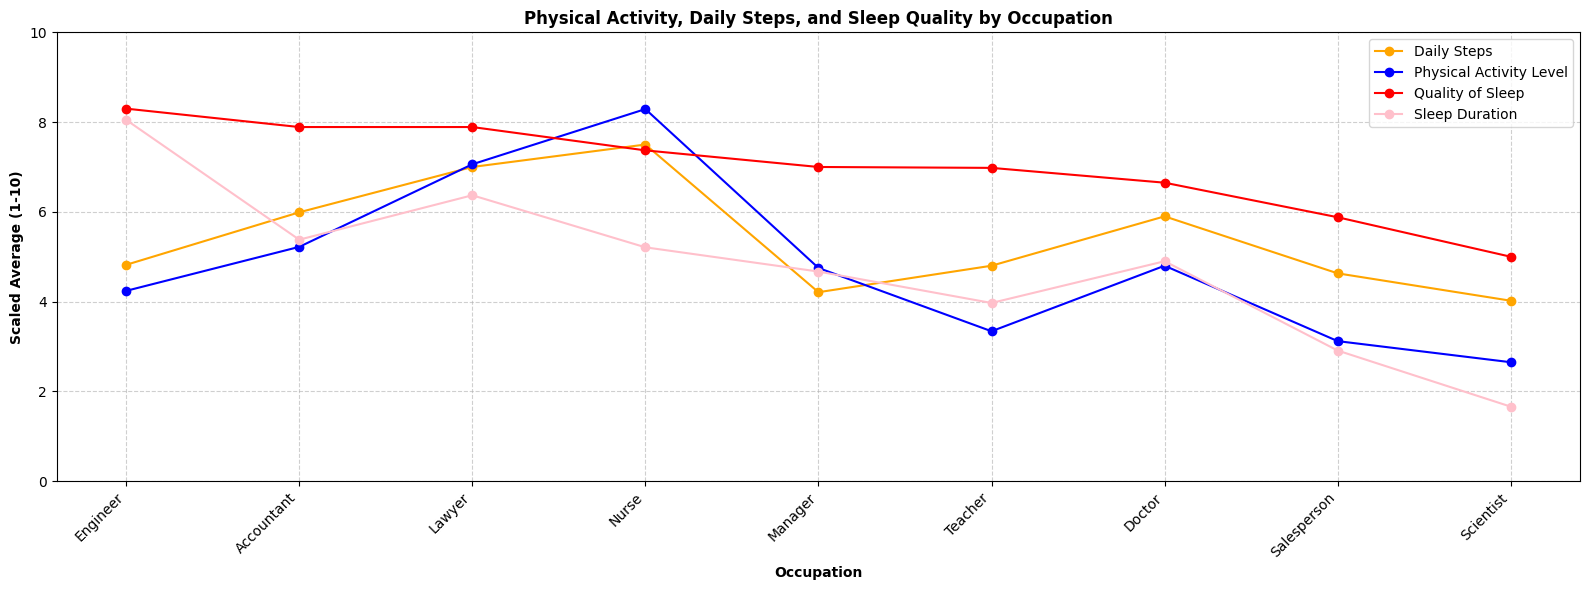

In [17]:
plt.figure(figsize=(16, 6))

plt.plot(activity_viz.index, activity_viz['Daily Steps'], marker='o', color='orange', label='Daily Steps')
plt.plot(activity_viz.index, activity_viz['Physical Activity Level'], marker='o', color='blue', label='Physical Activity Level')
plt.plot(activity_viz.index, activity_viz['Quality of Sleep'], marker='o', color='red', label='Quality of Sleep')
plt.plot(activity_viz.index, activity_viz['Sleep Duration'], marker='o', color='pink', label='Sleep Duration')

plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 10)
plt.title("Physical Activity, Daily Steps, and Sleep Quality by Occupation", fontweight='bold')
plt.xlabel("Occupation", fontweight='bold')
plt.ylabel("Scaled Average (1-10)", fontweight='bold')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Correlation Analysis

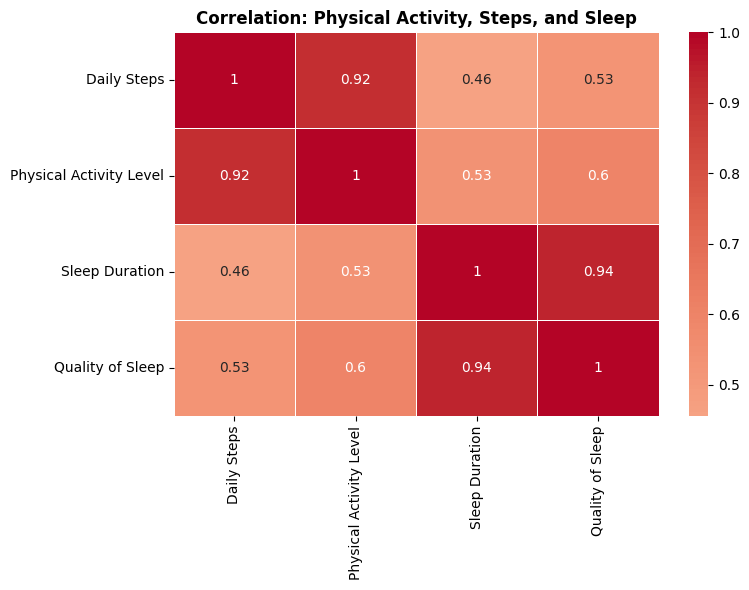

In [18]:
## AI Acknowledgement: I asked ChatGPT how to normalize for correlation testing
df_scaled_corr = df.copy()
col_scale = ['Daily Steps', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']
scaler = StandardScaler()
df_scaled_corr[col_scale] = scaler.fit_transform(df_scaled_corr[col_scale]).round(2)

activity_viz_corr = df_scaled_corr.groupby('Occupation')[col_scale].mean().round(2)

plt.figure(figsize=(8, 6))
correlation_matrix = activity_viz_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation: Physical Activity, Steps, and Sleep", fontweight='bold')
plt.tight_layout()
plt.show()

### Key Findings
- **Strong positive correlation** (0.98) between Physical Activity Level and Daily Steps - as expected, these metrics track together
- **Moderate positive correlation** (0.56) between Physical Activity Level and Sleep Quality - more active people tend to sleep better
- **Moderate positive correlation** (0.52) between Physical Activity Level and Sleep Duration - more active people tend to sleep longer
- **Moderate positive correlation** (0.46) between Daily Steps and Sleep Quality
- Engineers and teachers show both high physical activity and good sleep quality
- Scientists have lower activity levels but still maintain good sleep quality

---

## Visualization 3: BMI Category and Sleep Disorders

### Caption
This visualization examines the relationship between BMI category, sleep quality, and the prevalence of sleep disorders. We investigate whether certain BMI categories are associated with specific sleep disorders like insomnia or sleep apnea.

### Sleep Quality by BMI Category

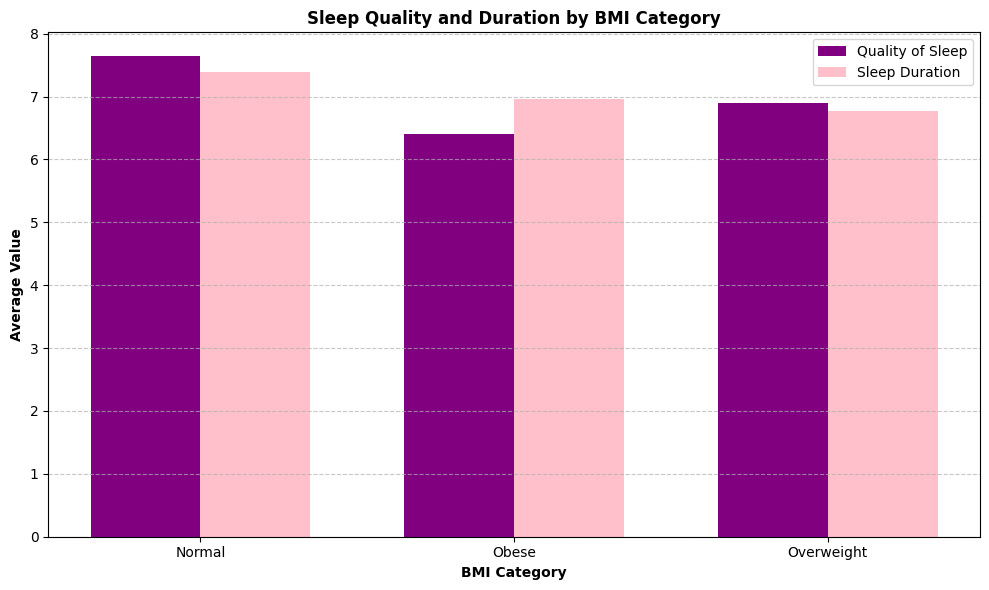

In [19]:
bmi_viz = df.groupby('BMI Category')[['Quality of Sleep', 'Sleep Duration']].mean().round(2)

plt.figure(figsize=(10, 6))

bar_width = 0.35
x = range(len(bmi_viz))

plt.bar([p - bar_width/2 for p in x], bmi_viz['Quality of Sleep'],
        width=bar_width, label='Quality of Sleep', color='purple')
plt.bar([p + bar_width/2 for p in x], bmi_viz['Sleep Duration'],
        width=bar_width, label='Sleep Duration', color='pink')

plt.xticks(x, bmi_viz.index)
plt.title('Sleep Quality and Duration by BMI Category', fontweight='bold')
plt.xlabel('BMI Category', fontweight='bold')
plt.ylabel('Average Value', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Sleep Disorder Distribution by BMI

In [20]:
# Count sleep disorders by BMI category
bmi_disorder_counts = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
bmi_disorder_percent = pd.crosstab(df['BMI Category'], df['Sleep Disorder'], normalize='index') * 100
bmi_disorder_percent = bmi_disorder_percent.round(2)

print("Sleep Disorder Counts by BMI Category:")
print(bmi_disorder_counts)
print("\nSleep Disorder Percentages by BMI Category:")
print(bmi_disorder_percent)

Sleep Disorder Counts by BMI Category:
Sleep Disorder  Insomnia  None  Sleep Apnea
BMI Category                               
Normal                 9   200            7
Obese                  4     0            6
Overweight            64    19           65

Sleep Disorder Percentages by BMI Category:
Sleep Disorder  Insomnia   None  Sleep Apnea
BMI Category                                
Normal              4.17  92.59         3.24
Obese              40.00   0.00        60.00
Overweight         43.24  12.84        43.92


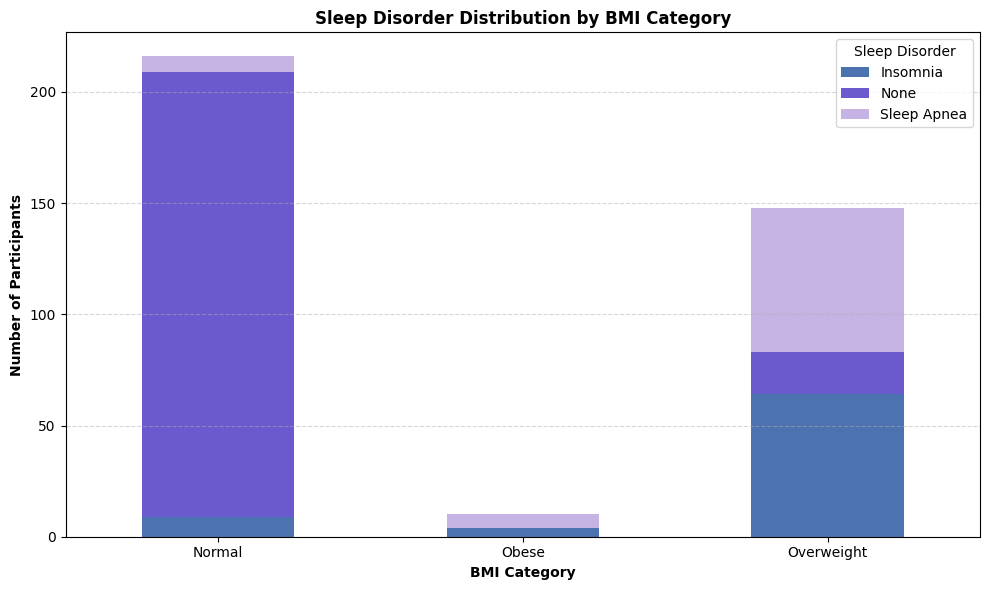

In [21]:
# Visualize with stacked bar chart
bmi_disorder_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=sleep_palette[:3])
plt.title('Sleep Disorder Distribution by BMI Category', fontweight='bold')
plt.xlabel('BMI Category', fontweight='bold')
plt.ylabel('Number of Participants', fontweight='bold')
plt.legend(title='Sleep Disorder')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Key Findings
- **Normal BMI** individuals have the highest average sleep quality (~7.2) and duration (~7.2 hours)
- **Overweight** individuals show slightly lower sleep quality (~6.8) and duration (~6.9 hours)
- **Obese** individuals have notably lower sleep quality (~6.2) and shorter duration (~6.5 hours)
- **Sleep Apnea** is significantly more prevalent in the Obese category (appears in the majority of obese participants)
- **Insomnia** is distributed across all BMI categories but is slightly more common in Normal and Overweight groups
- Most participants without sleep disorders fall into the Normal BMI category

---

## Conclusion

### Summary of Key Findings

This study analyzed the Sleep Health and Lifestyle dataset to understand the relationships between various lifestyle factors and sleep quality. The analysis revealed several important insights:

**1. Stress and Sleep:**
- Strong positive correlation between lower stress and better sleep quality (0.77)
- Occupations with lower stress levels (engineers, teachers) showed significantly better sleep quality
- Stress management appears to be a critical factor in sleep health

**2. Physical Activity and Sleep:**
- Moderate positive correlation between physical activity and sleep quality (0.56)
- More physically active individuals tend to sleep longer and report better sleep quality
- Both formal exercise and daily steps contribute to improved sleep outcomes

**3. BMI and Sleep Disorders:**
- Clear relationship between BMI category and sleep quality
- Sleep apnea is significantly more prevalent in individuals with obesity
- Normal BMI individuals report the best sleep quality and longest sleep duration

### Answers to Research Questions

**Q1: How does stress level correlate with sleep duration and quality?**

Lower stress levels are strongly associated with better sleep quality (r=0.77) and moderately associated with longer sleep duration (r=0.64). This suggests that stress management should be a priority for improving sleep health.

**Q2: Does physical activity level impact sleep quality?**

Yes, physical activity shows a moderate positive correlation with sleep quality (r=0.56). Individuals who are more physically active tend to sleep better, supporting the recommendation for regular exercise as part of good sleep hygiene.

**Q3: Is there a relationship between BMI category and sleep disorders?**

Yes, there is a clear relationship. Individuals with obesity show much higher rates of sleep apnea and lower overall sleep quality compared to those with normal BMI. This highlights the importance of maintaining a healthy weight for sleep health.

### Limitations

This study has several limitations that should be considered:

1. **Sample Demographics:** The dataset is heavily skewed toward healthcare workers (~38% of participants) and the 35-44 age group, which may not represent the general population
2. **Small Sample Sizes:** Some occupations (scientists n=4, managers n=1) have very few representatives, limiting generalizability
3. **Missing Variables:** Sleep schedule/consistency data is not included, which is known to be important for sleep quality
4. **Cross-Sectional Data:** This is a snapshot in time and cannot establish causation
5. **Self-Reported Measures:** Sleep quality and stress levels are subjective measures

### Recommendations for Future Research

1. **Collect Longitudinal Data:** Track participants over time to establish causal relationships
2. **Include Sleep Schedule:** Add variables for sleep timing consistency and circadian rhythm patterns
3. **Expand Demographics:** Include more diverse occupations, age ranges, and equal representation across groups
4. **Objective Measures:** Incorporate objective sleep quality measures (e.g., sleep tracking devices) alongside subjective ratings
5. **Intervention Studies:** Test specific interventions (stress management programs, exercise regimens) to see if they improve sleep outcomes

### Practical Implications

Based on these findings, individuals looking to improve their sleep should consider:
- **Managing stress** through mindfulness, time management, or professional support
- **Increasing physical activity** to at least moderate levels with regular daily movement
- **Maintaining a healthy weight** to reduce risk of sleep disorders
- **Prioritizing sleep hygiene** including consistent sleep schedules (not captured in this dataset but supported by external research)

According to the ODPHP guidelines, adults should aim for at least 7 hours of quality sleep per night. This study reinforces that lifestyle factors—particularly stress management, physical activity, and healthy weight—play important roles in achieving this goal.